In [99]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report


In [100]:
df=pd.read_csv("C:/Users/HP/Downloads/matches.csv")
df.head()

,match_id,date,venue,team1,team2,stage,toss_winner,toss_decision,first_ings_score,first_ings_wkts,second_ings_score,second_ings_wkts,match_winner,won_by,balls_left,player_of_the_match,top_scorer,highscore,best_bowling,best_bowling_figure
0,1,"March 22,2025","Eden Gardens, Kolkata",KKR,RCB,League,RCB,Bowl,174,8,177,3,RCB,7 wickets,22,Krunal Pandya,Virat Kohli,59,Krunal Pandya,3--29
1,2,"March 23,2025","Rajiv Gandhi International Stadium, Hyderabad",SRH,RR,League,RR,Bowl,286,6,242,6,SRH,44 runs,0,Ishan Kishan,Ishan Kishan,106,Tushar Deshpande,3--44
2,3,"March 23,2025","MA Chidambaram Stadium, Chennai",CSK,MI,League,CSK,Bowl,155,9,158,6,CSK,4 wickets,5,Noor Ahmad,Rachin Ravindra,65,Noor Ahmad,4--18
3,4,"March 24,2025","ACA-VDCA Cricket Stadium, Vishakhapatnam",DC,LSG,League,DC,Bowl,209,8,211,9,DC,1 wickets,3,Ashutosh Sharma,Nicholas Pooran,75,Mitchell Starc,3--42
4,5,"March 25,2025","Narendra Modi Stadium, Ahmedabad",GT,PBKS,League,GT,Bowl,243,5,232,5,PBKS,11 runs,0,Shreyas Iyer,Shreyas Iyer,97,Sai Kishore,3--30


In [101]:
df['team1_win'] = (df['match_winner'] == df['team1']).astype(int)

In [102]:
features = ['first_ings_score', 'first_ings_wkts', 'second_ings_score', 'second_ings_wkts', 'balls_left']
df['toss_decision_encoded'] = LabelEncoder().fit_transform(df['toss_decision'])
features.append('toss_decision_encoded')

In [103]:
X = df[features]
y = df['team1_win']


In [104]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [106]:
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

In [107]:
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


In [108]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", report)

Accuracy: 0.60
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.50      0.50      0.50         2

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [109]:
import matplotlib.pyplot as plt

In [110]:
perceptron = Perceptron(max_iter=1, warm_start=True, tol=None, random_state=42)
train_accuracies = []
test_accuracies = []
epochs = 50

for epoch in range(epochs):
    perceptron.fit(X_train, y_train)
    train_acc = perceptron.score(X_train, y_train)
    test_acc = perceptron.score(X_test, y_test)
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

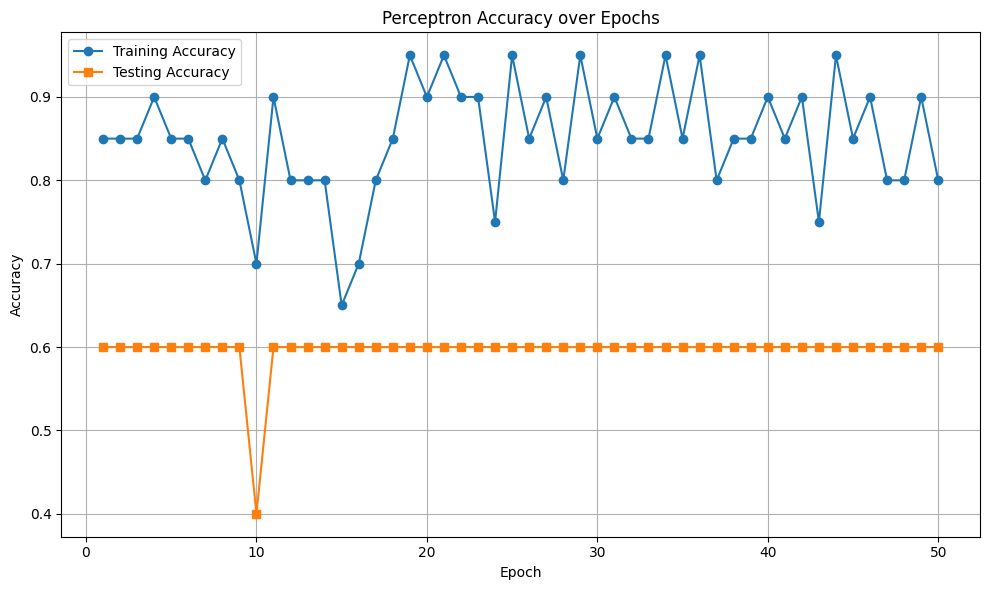

In [111]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), train_accuracies, label='Training Accuracy', marker='o')
plt.plot(range(1, epochs + 1), test_accuracies, label='Testing Accuracy', marker='s')
plt.title('Perceptron Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()